# Assignment 3
## 1: `git` in practice

Link to this repository: [astr8004_assign3](https://github.com/cyb0rb/astr8004_assign3)

## 2: Using ADQL to search for bright stars around the open cluster M67


In [23]:
import numpy as np
from astroquery.gaia import Gaia


## 3: Radial metallicity relation in simulated data

In [49]:
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.optimize import curve_fit

In [25]:
# load and get data from file
datafile = "data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits"    
data = Table.read(datafile)
print(data.info)

# radius
radius = np.sqrt(data['x']**2 + data['y']**2 + data['z']**2)

<Table length=511520>
name  dtype 
---- -------
   x float32
   y float32
   z float32
 A_O float64



In [60]:
# fit linear function to data
def linear(x, a, b):
    return a*x + b

params, pcov = curve_fit(linear, radius, data['A_O'])
uncertainty = np.sqrt(np.diag(pcov))

print(f"Slope: {params[0]:.6f} ± {uncertainty[0]:.6f}")
print(f"Intercept: {params[1]:.5f} ± {uncertainty[1]:.5f}")

fit_data = linear(radius, *params)
residuals = data["A_O"] - fit_data

Slope: -0.033250 ± 0.000018
Intercept: 9.12232 ± 0.00028


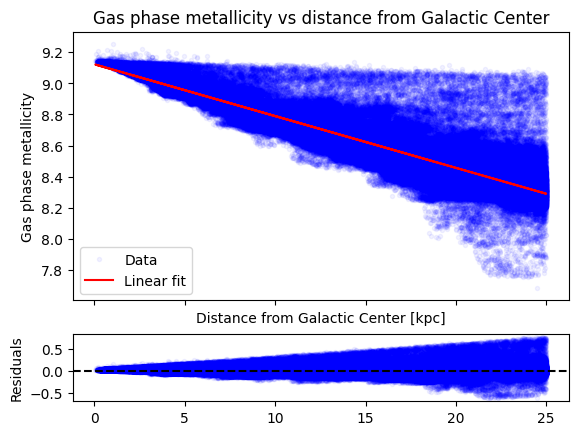

In [70]:
# plot data from file

gridspec = {'height_ratios': [4,1]}
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=gridspec)

ax1.plot(radius, data['A_O'], "b.", alpha=0.05, label="Data")
ax1.plot(radius, fit_data, "-r", label="Linear fit")
ax1.set(
    xlabel = "Distance from Galactic Center [kpc]",
    ylabel = "Gas phase metallicity",
    title  = "Gas phase metallicity vs distance from Galactic Center"
)

ax2.plot(radius, residuals, "b.", alpha=0.05)
ax2.axhline(y=0, color="black", linestyle="--")
ax2.set(
    ylabel = "Residuals"
)
ax1.legend()
fig.savefig("data/metallicity.png")
plt.show()
